# 31 Obtaining City Locations

Locations of cities for easy plotting can be obtained using GeoPy with GemGIS.

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/31_obtaining_location_information/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Getting Location Information

Location information from different cities can be obtained using GeoPy. These contain a description of the location as well as longitude and latitude values.

In [2]:
aachen = gg.utils.get_location_coordinate(name='Aachen')
aachen

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Location(Aachen, Städteregion Aachen, Nordrhein-Westfalen, Deutschland, (50.776351, 6.083862, 0.0))

In [3]:
berlin = gg.utils.get_location_coordinate(name='Berlin')
berlin

Location(Berlin, 10117, Deutschland, (52.5170365, 13.3888599, 0.0))

## Reprojecting Coordinates

The WGS 84 coordinates can be reprojected using ``transform_location_coordinate(..)``.

In [4]:
aachen_repr = gg.utils.transform_location_coordinate(coordinates=aachen,
                                                     crs='EPSG:4647')
aachen_repr

{'Aachen, Städteregion Aachen, Nordrhein-Westfalen, Deutschland': (32294411.33488576,
  5629009.357074926)}

In [5]:
berlin_repr = gg.utils.transform_location_coordinate(coordinates=berlin,
                                                     crs='EPSG:4647')
berlin_repr

{'Berlin, 10117, Deutschland': (32797738.56053437, 5827603.740024588)}

## Creating Bounding Polygon from Location

Each location also consists of a bounding box which can be used to create a Shapely Polygon from it using ``create_polygon_from_location(..)``.

(50.6621373, 5.9748624, 50.8572449, 6.2180747)


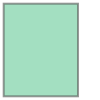

In [6]:
aachen_bbox = gg.utils.create_polygon_from_location(coordinates=aachen)

print(aachen_bbox.bounds)
aachen_bbox

(52.3570365, 13.2288599, 52.6770365, 13.5488599)


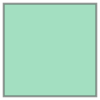

In [7]:
berlin_bbox = gg.utils.create_polygon_from_location(coordinates=berlin)

print(berlin_bbox.bounds)
berlin_bbox

## Getting the locations of multiple cities

The function ``get_locations(..)`` allows to pass a list of cities and returns a dict with the city names and the corresponding coordinates.

In [8]:
coordinates_dict = gg.utils.get_locations(names = ['Aachen', 'Berlin', 'München', 'Hamburg', 'Köln'], crs='EPSG:4647')
coordinates_dict

{'Aachen, Städteregion Aachen, Nordrhein-Westfalen, Deutschland': (32294411.33488576,
  5629009.357074926),
 'Berlin, 10117, Deutschland': (32797738.56053437, 5827603.740024588),
 'München, Bayern, Deutschland': (32691595.356409974, 5334747.274305081),
 'Hamburg, Deutschland': (32566296.251301013, 5933959.964708338),
 'Köln, Nordrhein-Westfalen, Deutschland': (32356668.818424627,
  5644952.099932303)}

## Converting Location Dict into GeoDataFrame

In order to work with the coordinates and location names, the dict can be converted to a GeoDataFrame. 

In [9]:
import geopandas as gpd
gdf = gg.utils.convert_location_dict_to_gdf(location_dict=coordinates_dict)
gdf

,City,X,Y,geometry
0,Aachen,32294411.33,5629009.36,POINT (32294411.335 5629009.357)
1,Berlin,32797738.56,5827603.74,POINT (32797738.561 5827603.740)
2,München,32691595.36,5334747.27,POINT (32691595.356 5334747.274)
3,Hamburg,32566296.25,5933959.96,POINT (32566296.251 5933959.965)
4,Köln,32356668.82,5644952.10,POINT (32356668.818 5644952.100)
